In [1]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

# 1. 라이브러리 선언

일반 CPU 활용 시

In [1]:
# # 라이브러리 정의 
# from tensorflow import keras
# from tensorflow.keras import layers
# import numpy as np
# import pandas as pd

cuda nvidia gpu 활용 시

In [2]:
# How to check if the code is running on GPU or CPU?

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

# import os
# os.environ["CUDA_VISIBLE_DEVICES"]='0'

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8154274371314031038
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1443813785
locality {
  bus_id: 1
  links {
  }
}
incarnation: 18387826409050196132
physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"
]


intel gpu 활용 시

In [3]:
# import numpy as np
# import os

# # intel gpu 적용
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
# import keras
# # mnist 데이터셋 
# from keras.datasets import mnist


In [1]:
import os
import cv2
from tensorflow import keras
# 케라스 모델 생성 라이브러리
from tensorflow.keras import models
# 레이어 생성 라이브러리 (Dense: 입출력 연결)
from tensorflow.keras import layers
# 케라스 샘플데이터[mnist] 라이브러리 불러오기
from tensorflow.keras.datasets import mnist
# numpy 라이브러리
import numpy as np
from numpy import array
# 케라스 카테고리 라이브러리
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
# 시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline


ModuleNotFoundError: No module named 'cv2'

# 2. 데이터 불러오기

### 1. 훈련데이터 

In [9]:
TRAIN_DIR = '../images/mnist/trainingSet/'
train_folder_list = array(os.listdir(TRAIN_DIR))
train_folder_list

IMG_SIZE = 28
train_images=[]
train_labels=[]
for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            train_images.append(new_img)
            train_labels.append(index)
        except:
            pass

### 2. 테스트 데이터 

In [10]:
TEST_DIR = '../images/mnist/testSet/'
test_folder_list = array(os.listdir(TEST_DIR))
test_folder_list

test_images=[]
test_labels=[]
for index in range(len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        test_images.append(new_img)
        test_labels.append(index)

### 3. 데이터셋 확인

In [11]:
train_images = array(train_images)
train_labels = array(train_labels)
test_images = array(test_images)
test_labels = array(test_labels)

In [12]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (42000, 28, 28) (42000,)
Testing data shape :  (200, 28, 28) (200,)


In [13]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
 
# 훈련데이터의 답지분류 범위 정의
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'label : 2')

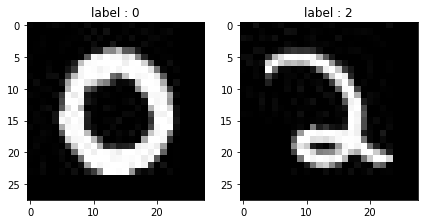

In [15]:
# 훈련/데이터 데이터 시각화
plt.figure(figsize=[7,5])
plt.subplot(121)
plt.imshow(train_images[0], cmap='gray')
plt.title("label : {}".format(train_labels[0]))
plt.subplot(122)
plt.imshow(test_images[42], cmap='gray')
plt.title("label : {}".format(test_labels[42]))

# 3. 데이터 정제

### 3-1. 이미지(28*28) 매트릭스 변환 (w,h,d)

In [16]:
train_images.shape

(42000, 28, 28)

In [17]:
train_data = train_images.reshape(len(train_images), IMG_SIZE,IMG_SIZE)
test_data = test_images.reshape(len(test_images), IMG_SIZE,IMG_SIZE)

In [18]:
train_images.shape

(42000, 28, 28)

In [19]:
train_data.shape

(42000, 28, 28)

In [20]:
train_images[0][1]

array([ 0,  0,  0,  0,  0,  0,  0,  1,  5,  0, 12,  0, 16,  0,  0,  4,  0,
        2,  8,  3,  0,  4,  8,  0,  0,  0,  0,  0], dtype=uint8)

### 3-2. float 타입변환 및 정규화

In [21]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

train_data /= 255
test_data /= 255

### 3-3. 답지 분류형으로 변환

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[10000])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[10000])

Original label 0 :  2
After conversion to categorical ( one-hot ) :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [24]:
test_labels_one_hot.shape

(200, 10)

In [25]:
from numpy import argmax

In [26]:
argmax(train_labels_one_hot[10000])

2

In [27]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[2])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[2])

Original label 0 :  0
After conversion to categorical ( one-hot ) :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 4. 케라스 모델 정의

In [28]:
# 입력데이터 형태
modelDim = train_data[0].shape
modelDim

(28, 28)

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [30]:
# 입력데이터 형태
modelDim = train_data[0].shape

# 층 누적 기본형태
model = Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(Flatten(input_shape=modelDim))
model.add(Dense(32, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


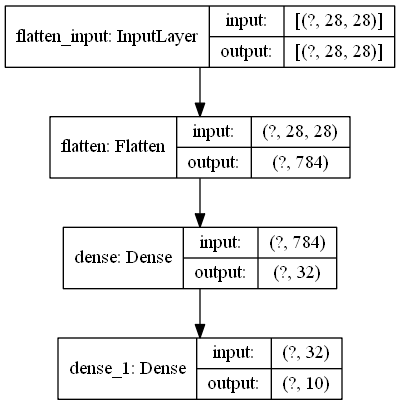

In [32]:
# 모델 시각화
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)

# 5. 모델 컴파일

In [33]:
# Sequatial 방싱 케라스모델
# 손실함수(LOSS): 훈련동안 최소화될 값 지표 (mse, categorical_crossentropy)
# 손실함수를 기반으로 Neural Net 업데이터 결정 (mse, mae, accuracy)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 6. 모델 훈련

In [34]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [37]:
import os
from datetime import datetime

from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

datetime.now().strftime("%Y%m%d_%H%M%S")

logdir = os.path.join("logs_c", datetime.now().strftime("%Y%m%d_%H%M%S"))
logdir

callbacks = [
    
    TensorBoard(
    log_dir = logdir),
    
    EarlyStopping(monitor="val_loss", patience=10),
    
    ModelCheckpoint(filepath="model_mnist_weights.h5", 
                    monitor='val_accuracy',verbose=1, save_best_only=True, mode='max')
]

In [38]:
# 텐서를 CPU에 할당
# with tf.device('/GPU:0'):
history = model.fit(train_data,
                     train_labels_one_hot,
                     epochs=10,
                     batch_size=32,
                     shuffle=True,
                     callbacks=callbacks,
                     validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33248/33600 [============================>.] - ETA: 0s - loss: 0.3165 - accuracy: 0.9162
Epoch 00001: val_accuracy improved from -inf to 0.01679, saving model to model_mnist_weights.h5
33600/33600 [==============================] - 6s 192us/sample - loss: 0.3147 - accuracy: 0.9166 - val_loss: 12.7252 - val_accuracy: 0.0168
Epoch 2/10
33088/33600 [============================>.] - ETA: 0s - loss: 0.1434 - accuracy: 0.9587
Epoch 00002: val_accuracy did not improve from 0.01679
33600/33600 [==============================] - 5s 134us/sample - loss: 0.1425 - accuracy: 0.9588 - val_loss: 14.1032 - val_accuracy: 0.0168
Epoch 3/10
33344/33600 [============================>.] - ETA: 0s - loss: 0.1116 - accuracy: 0.9676
Epoch 00003: val_accuracy improved from 0.01679 to 0.01690, saving model to model_mnist_weights.h5
33600/33600 [==============================] - 6s 166us/sample - loss: 0.1111 - accuracy: 0.9677 - val_loss: 15.1114 - va

In [39]:
import pandas as pd

In [40]:
pd.DataFrame(history.history).tail(5)

,loss,accuracy,val_loss,val_accuracy
5,0.064961,0.981012,18.312933,0.016905
6,0.056118,0.984077,19.583479,0.016786
7,0.049412,0.985417,20.578420,0.016905
8,0.042992,0.987292,21.845447,0.017262
9,0.037358,0.988810,22.653396,0.017024


# 7. 모델 추론

In [41]:
# verbose: 정보표시 레벨 (0,1)
test_loss, test_acc = model.evaluate(test_data, 
                                     test_labels_one_hot)
print(test_loss, test_acc)


200/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# 8. 훈련내용 확인하기 (Tensorboard)

# 9. 예측 및 비교

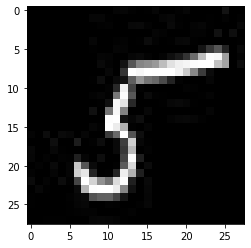

In [42]:
prd_images = []
imgpah="../images/mnist/testSet/5/img_24.jpg"
img = cv2.imread(imgpah, cv2.IMREAD_GRAYSCALE)
prd_images.append(img)
prd_images=array(prd_images)

plt.imshow(img, cmap="gray")

In [43]:
test_data2 = prd_images.reshape(len(prd_images) , IMG_SIZE, IMG_SIZE)
test_data2 = test_data2.astype('float')
test_data2 /= 255

In [44]:
# Predict the most likely class
label_pred = model.predict(test_data2[[0],:])

In [45]:
label_pred

array([[3.24357934e-05, 6.01299519e-07, 2.61924704e-08, 1.23000760e-07,
        1.35413085e-08, 9.99966025e-01, 3.41855241e-07, 4.82178223e-07,
        7.27703175e-10, 2.35384023e-09]], dtype=float32)

In [46]:
np.argmax(label_pred)

5

# GPU 메모리 해제

In [47]:
from tensorflow.keras import backend as K

K.clear_session()

from numba import cuda
cuda.select_device(0)
cuda.close()

### 다른모델 생성 (과적합 회피)

In [199]:
from keras.layers import Dropout

# 입력데이터 형태
modelDim = train_data[0].shape

# 층 누적 기본형태
model = Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(Flatten(input_shape=modelDim))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

W0918 18:20:26.298769 19452 deprecation.py:506] From C:\Users\kopo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________
